# First PyTorch Neural Network - MNIST Classifier

Make Your First GAN With PyTorch, 2020

In [1]:
from rich import print

## import libraries

In [2]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt

import mnist_data

## Load Data

Using CUDA will slow the training process for this small dataset.

In [3]:
train_csv = mnist_data.datadir.joinpath('mnist_train.csv')
mnist_dataset = mnist_data.MnistDataset(train_csv)

## Neural Network Class

In [4]:
from mnist_classifier import Classifier

## Create neural network

In [6]:
C = Classifier()  

# move neural network to the GPU
if mnist_dataset.device.type == 'cuda':
    print('Move neural network to GPU')
    C.cuda()

## Train network on MNIST data set

In [7]:
%%time

epochs = 5

for i in range(epochs):
    print(f'training epoch {i+1} of {epochs}')
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor, print_counter=True)

training epoch 1 of 5

training epoch 2 of 5

training epoch 3 of 5

training epoch 4 of 5

training epoch 5 of 5

CPU times: user 1h 1min, sys: 50min 32s, total: 1h 51min 33s
Wall time: 7min 13s


## Plot classifier error

<Figure size 1152x576 with 1 Axes>

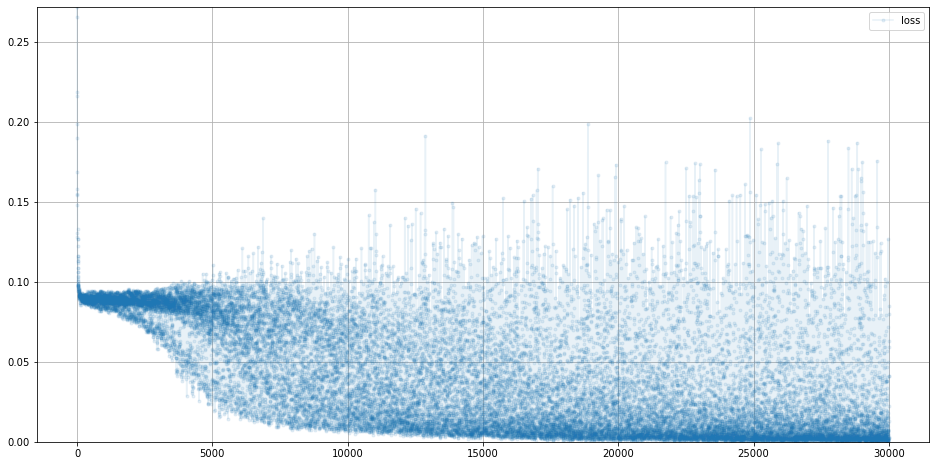

In [8]:
C.plot_progress()

## Classification Example

### load MNIST test data

In [9]:
test_csv = mnist_data.datadir.joinpath("mnist_test.csv")
mnist_test_dataset = mnist_data.MnistDataset(test_csv)

### pick a record

<Figure size 432x288 with 1 Axes>

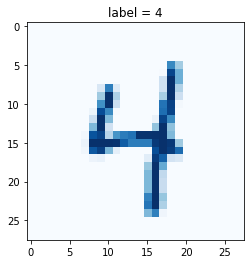

In [10]:
record = 19
mnist_test_dataset.plot_image(record)  # plot image and correct label

### visualise the answer given by the neural network

<AxesSubplot:>

<Figure size 432x288 with 1 Axes>

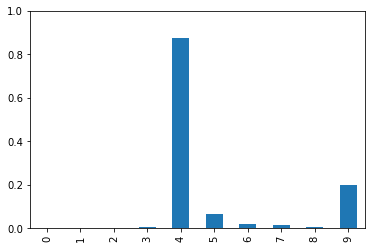

In [11]:
image_data = mnist_test_dataset[record][1]

# query from trained network
output = C.forward(image_data)

if mnist_dataset.device.type == 'cuda':
    output = output.cpu()
    
# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

## Classifier Performance

In [12]:
# test trained neural network on training data

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor)
    if mnist_test_dataset.device.type == 'cuda':
        answer = answer.cpu()
    if (answer.detach().numpy().argmax() == label):
        score += 1
    items += 1

In [13]:
print(f"{score = }, {items = }, {score/items = }")

score = 8891, items = 10000, score/items = 0.8891